install ipympl

`conda install -c conda-forge ipympl`

and restart jupyter notebook

In [1]:
%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:


with open('../data/obj/Eros Gaskell 50k poly.obj', 'r') as f:
    file = f.read()
    file = file.splitlines()
       

In [3]:
vfs = file[11:]
verts = []
faces = []
for i in range(len(vfs)):
    vfs[i] = vfs[i].split(' ')
    
    if vfs[i][0] == 'v':
        verts.append(vfs[i][1:])
    
    elif vfs[i][0] == 'f':
        faces.append(vfs[i][1:])
    

In [4]:
verts = np.array(verts, dtype= float)
faces = np.array(faces, dtype= float)
verts

array([[-9.35813,  3.76523,  3.8082 ],
       [-9.11601,  3.81266,  3.85523],
       [-8.87554,  3.86414,  3.90521],
       ...,
       [ 5.56375,  3.59955, -2.97935],
       [ 5.77286,  3.49709, -2.88132],
       [ 5.98246,  3.39538, -2.78347]])

In [5]:
df_f = pd.DataFrame(faces, columns= ['x','y','z'])
df_f

,x,y,z
0,1.0,67.0,2.0
1,1.0,66.0,67.0
2,66.0,132.0,67.0
3,66.0,131.0,132.0
4,131.0,197.0,132.0
...,...,...,...
49147,25154.0,25219.0,21123.0
49148,25219.0,21124.0,21123.0
49149,25219.0,25284.0,21124.0
49150,25284.0,16836.0,21124.0


In [6]:
df_v = pd.DataFrame(verts, columns= ['x','y','z'])
df_v

,x,y,z
0,-9.35813,3.76523,3.80820
1,-9.11601,3.81266,3.85523
2,-8.87554,3.86414,3.90521
3,-8.63695,3.91930,3.95768
4,-8.39712,3.97065,4.00731
...,...,...,...
25345,5.16697,3.83943,-3.18429
25346,5.36410,3.71767,-3.08140
25347,5.56375,3.59955,-2.97935
25348,5.77286,3.49709,-2.88132


In [11]:
df_v= (df_v-(df_v.max(0)+df_v.min(0))/2)/max(df_v.max(0)-df_v.min(0))
df_v

,x,y,z
0,-0.248705,0.110432,0.119454
1,-0.241291,0.111884,0.120894
2,-0.233928,0.113460,0.122424
3,-0.226622,0.115149,0.124031
4,-0.219279,0.116722,0.125550
...,...,...,...
25345,0.196053,0.112704,-0.094656
25346,0.202089,0.108976,-0.091506
25347,0.208203,0.105359,-0.088381
25348,0.214606,0.102221,-0.085379


interactive 3D plots are laggy so they're just raw text cells until you want to run them (make them code cells and run the cell)

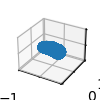

In [13]:
fig = plt.figure(figsize= (1,1))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(df_v['x'], df_v['y'], df_v['z'])
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
plt.show()

NameError: name 'triangles' is not defined

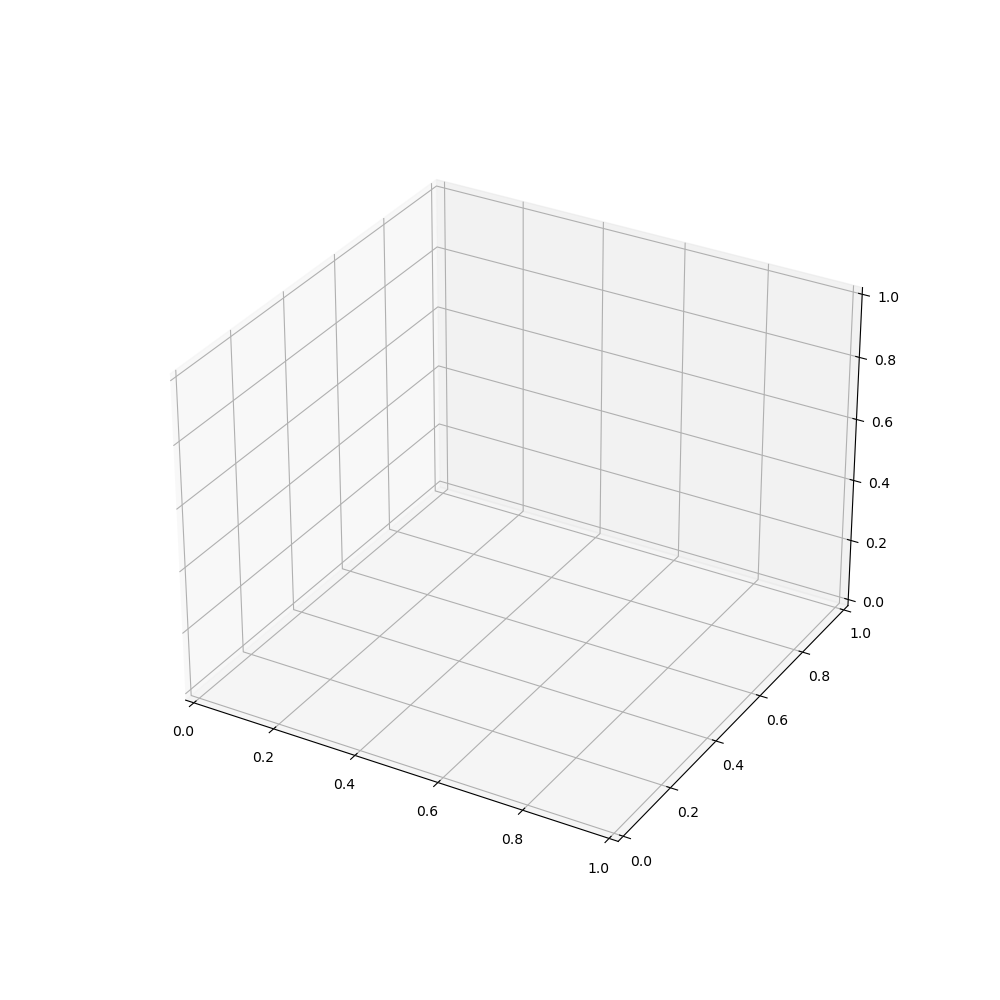

In [21]:
fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(projection= '3d')


ax.plot_trisurf(df_v['x'], df_v['y'],triangles, df_v['z'])
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()

[whatever this is](https://matplotlib.org/matplotblog/posts/custom-3d-engine/)

i litteraly have no idea how this works

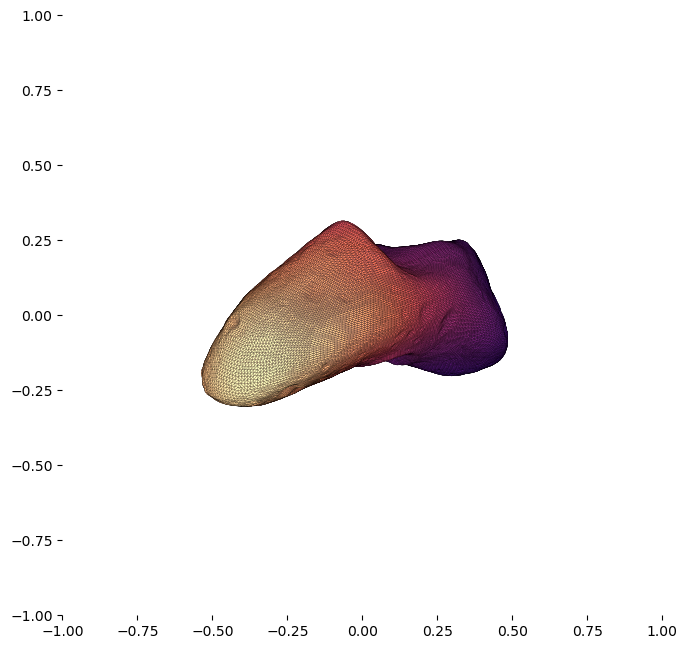

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

def frustum(left, right, bottom, top, znear, zfar):
    M = np.zeros((4, 4), dtype=np.float32)
    M[0, 0] = +2.0 * znear / (right - left)
    M[1, 1] = +2.0 * znear / (top - bottom)
    M[2, 2] = -(zfar + znear) / (zfar - znear)
    M[0, 2] = (right + left) / (right - left)
    M[2, 1] = (top + bottom) / (top - bottom)
    M[2, 3] = -2.0 * znear * zfar / (zfar - znear)
    M[3, 2] = -1.0
    return M
def perspective(fovy, aspect, znear, zfar):
    h = np.tan(0.5*np.radians(fovy)) * znear
    w = h * aspect
    return frustum(-w, w, -h, h, znear, zfar)
def translate(x, y, z):
    return np.array([[1, 0, 0, x], [0, 1, 0, y],
                     [0, 0, 1, z], [0, 0, 0, 1]], dtype=float)
def xrotate(theta):
    t = np.pi * theta / 180
    c, s = np.cos(t), np.sin(t)
    return np.array([[1, 0,  0, 0], [0, c, -s, 0],
                     [0, s,  c, 0], [0, 0,  0, 1]], dtype=float)
def yrotate(theta):
    t = np.pi * theta / 180
    c, s = np.cos(t), np.sin(t)
    return  np.array([[ c, 0, s, 0], [ 0, 1, 0, 0],
                      [-s, 0, c, 0], [ 0, 0, 0, 1]], dtype=float)
V, F = [], []
with open("../data/obj/Eros Gaskell 50k poly.obj") as f:
    for line in f.readlines():
        if line.startswith('#'):  continue
        values = line.split()
        if not values:            continue
        if values[0] == 'v':      V.append([float(x) for x in values[1:4]])
        elif values[0] == 'f' :   F.append([int(x) for x in values[1:4]])
V, F = np.array(V), np.array(F)-1
V = (V-(V.max(0)+V.min(0))/2) / max(V.max(0)-V.min(0))
MVP = perspective(25,1,1,100) @ translate(0,0,-3.5) @ xrotate(20) @ yrotate(45)
V = np.c_[V, np.ones(len(V))]  @ MVP.T
V /= V[:,3].reshape(-1,1)
V = V[F]
T =  V[:,:,:2]
Z = -V[:,:,2].mean(axis=1)
zmin, zmax = Z.min(), Z.max()
Z = (Z-zmin)/(zmax-zmin)
C = plt.get_cmap("magma")(Z)
I = np.argsort(Z)
T, C = T[I,:], C[I,:]
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1], xlim=[-1,+1], ylim=[-1,+1], aspect=1, frameon=False)
collection = PolyCollection(T, closed=True, linewidth=0.1, facecolor=C, edgecolor="black")
ax.add_collection(collection)
plt.show()